# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


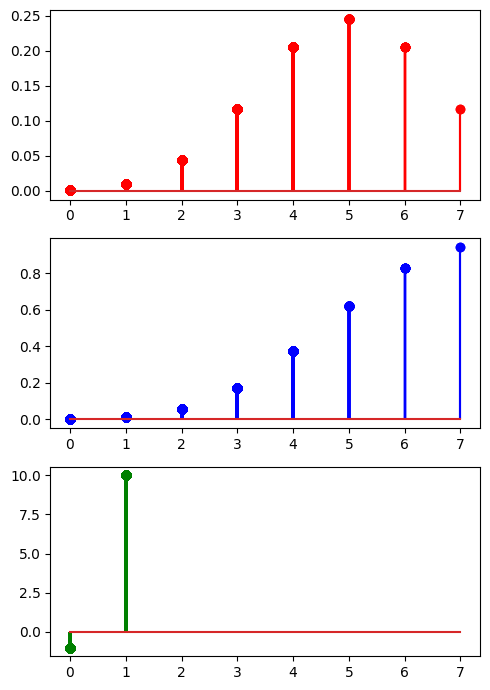

In [13]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)


pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [1]:
from scipy.stats import norm

# Distribución normal. Datos necesarios: media y desviación standard

# Función de densidad de probabilidad (PDF) para la distribución normal
def dnorm(x, mu=0, sigma=1):
    """
    Calcula la densidad de probabilidad de la distribución normal.
    """
    result = norm.pdf(x, loc=mu, scale=sigma)
    return result

# Función de distribución acumulada (CDF) para la distribución normal
def pnorm(q, mu=0, sigma=1):
    """
    Calcula el acumulado de la distribución normal.
    """
    result = norm.cdf(q, loc=mu, scale=sigma)
    return result

# Función cuantil (PPF) para la distribución normal
def qnorm(p, mu=0, sigma=1):
    """
    Calcula el cuantil de la distribución normal.
    """
    result = norm.ppf(p, loc=mu, scale=sigma)
    return result

# Generación de valores aleatorios para la distribución normal
def rnorm(n, mu=0, sigma=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mu, scale=sigma, size=n)
    return result

In [2]:
# Distribución normal(20, 5), dónde mu = 20 es la media y sigma = 5 es la desviación standard.

import numpy as np

np.random.seed(42)

print(f"Probability density of a Normal(20, 5) at 15: {dnorm(15, mu=20, sigma=5)}")
print(f"Probability that a Normal(20, 5) will take a value less than 15: {pnorm(15, mu=20, sigma=5)}")
print(f"Which value of a Normal(20, 5) has a cumulative probability of 0.9? {qnorm(0.9, mu=20, sigma=5)}")
print(f"Generate 2000 random values from a Normal(20, 5) distribution: {rnorm(2000, mu=20, sigma=5)}")

Probability density of a Normal(20, 5) at 15: 0.04839414490382867
Probability that a Normal(20, 5) will take a value less than 15: 0.15865525393145707
Which value of a Normal(20, 5) has a cumulative probability of 0.9? 26.407757827723003
Generate 2000 random values from a Normal(20, 5) distribution: [22.48357077 19.30867849 23.23844269 ... 15.59062674 19.18466518
 16.27548678]


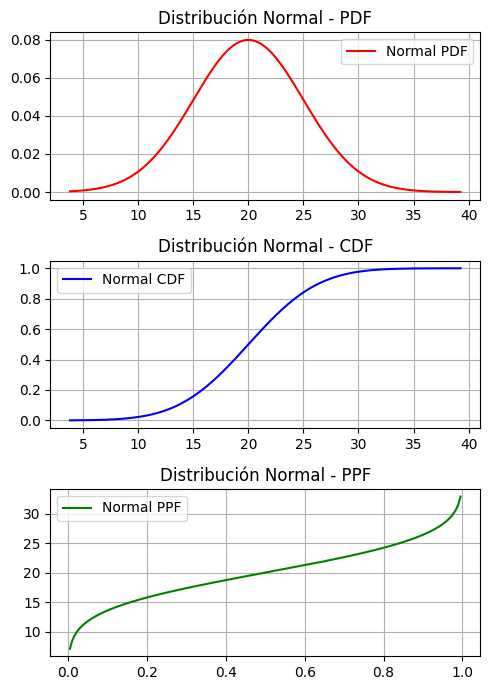

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

# Parámetros para la distribución normal y uniforme
mu, sigma = 20, 5  # Media y desviación estándar para la normal

# Generar datos aleatorios para las distribución normal
data_normal = rnorm(2000, mu=mu, sigma=sigma)

# Rango de valores x para la normal y uniforme
x_values = np.linspace(data_normal.min(), data_normal.max(), 200)

# Cálculo de PDF, CDF y PPF para la distribución normal
normal_pdf = dnorm(x_values, mu=mu, sigma=sigma)
normal_cdf = pnorm(x_values, mu=mu, sigma=sigma)
normal_ppf = [qnorm(p, mu=mu, sigma=sigma) for p in np.linspace(0, 1, 200)]

# Graficar resultados
fig, axes = plt.subplots(3, 1, figsize=(5, 7))

# Gráficos para la distribución normal
axes[0].plot(x_values, normal_pdf, 'r-', label='Normal PDF')
axes[1].plot(x_values, normal_cdf, 'b-', label='Normal CDF')
axes[2].plot(np.linspace(0, 1, 200), normal_ppf, 'g-', label='Normal PPF')


# Configurar etiquetas y títulos
axes[0].set_title('Distribución Normal - PDF')
axes[1].set_title('Distribución Normal - CDF')
axes[2].set_title('Distribución Normal - PPF')


# Mostrar leyendas y ajustar diseño
for ax in axes.flatten():
    ax.legend()
    ax.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# TODO
from scipy.stats import uniform

# Distribución uniforme. Datos necesarios: a=ínfimo y d=ancho. supremo=infimo+ancho; b=a+d

def duniform(datos, inf, ancho):
    """
    Calcula la estimación puntual de la distribución Uniforme.
    """
    result = uniform.pdf(datos, inf, ancho)

    return result

def puniform(datos, inf, ancho):
    """
    Calcula el acumulado de la distribución uniforme.
    """
    result = uniform.cdf(datos, inf, ancho)

    return result

def quniform(datos, inf, ancho):
    """
    Calcula la función cuantil a partir de la distribución uniforme.
    """
    result = uniform.ppf(datos, inf, ancho)

    return result

def runiform(datos, inf, ancho):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(datos, inf, ancho)

    return result

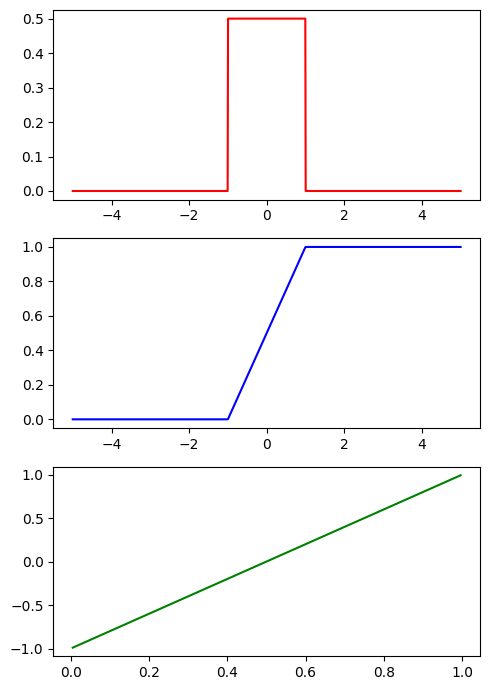

In [21]:
import matplotlib.pyplot as plt

np.random.seed(42)

inf = -1
ancho = 2
#data = rnorm(2000, mu=mu, sigma=sigma)
data = np.linspace(-5, 5, 1000)

pmf = duniform(data, inf, ancho)
cdf = puniform(data, inf, ancho)
ppf = quniform(data, inf, ancho)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pmf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()